### Here, I am going to do analysis over car prices data over various factors ex.("enginesize", "horsepower"..)

### Fetch the dataset

In [134]:
import pandas as pd;
#Get CSV data
data = pd.read_csv('./CarPrice_Assignment.csv')

### Clear and Load data into a dataframe and explore

In [135]:

data = pd.DataFrame(data)
df = data[["enginesize", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]]
df.head(10)

,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,130,111,5000,21,27,13495.000
1,130,111,5000,21,27,16500.000
2,152,154,5000,19,26,16500.000
3,109,102,5500,24,30,13950.000
4,136,115,5500,18,22,17450.000
5,136,110,5500,19,25,15250.000
6,136,110,5500,19,25,17710.000
7,136,110,5500,19,25,18920.000
8,131,140,5500,17,20,23875.000
9,131,160,5500,16,22,17859.167


### Explore

In [136]:
df.describe()

,enginesize,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,41.642693,39.544167,476.985643,6.542142,6.886443,7988.852332
min,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,97.000000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,120.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,141.000000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,326.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data visualizations of dependent prices over various independent values

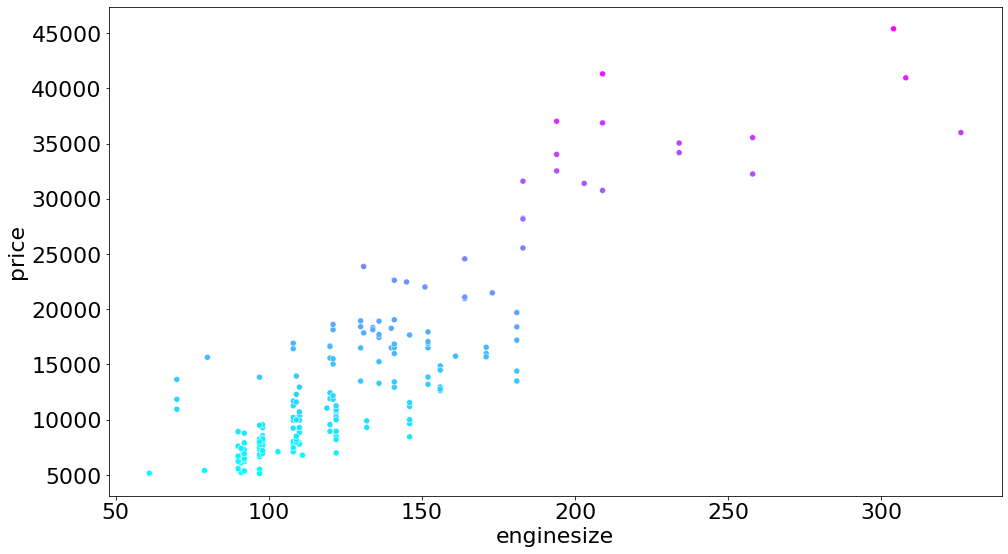

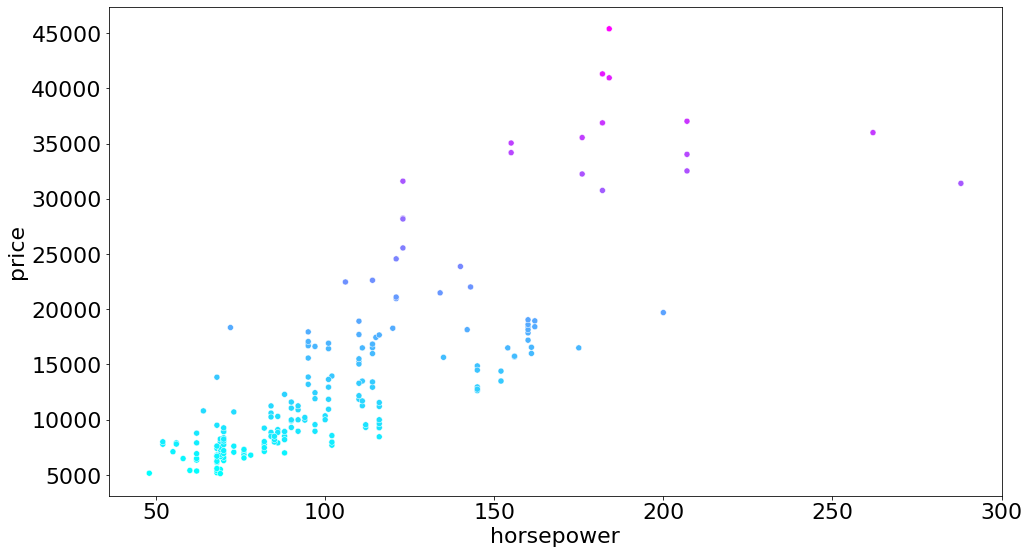

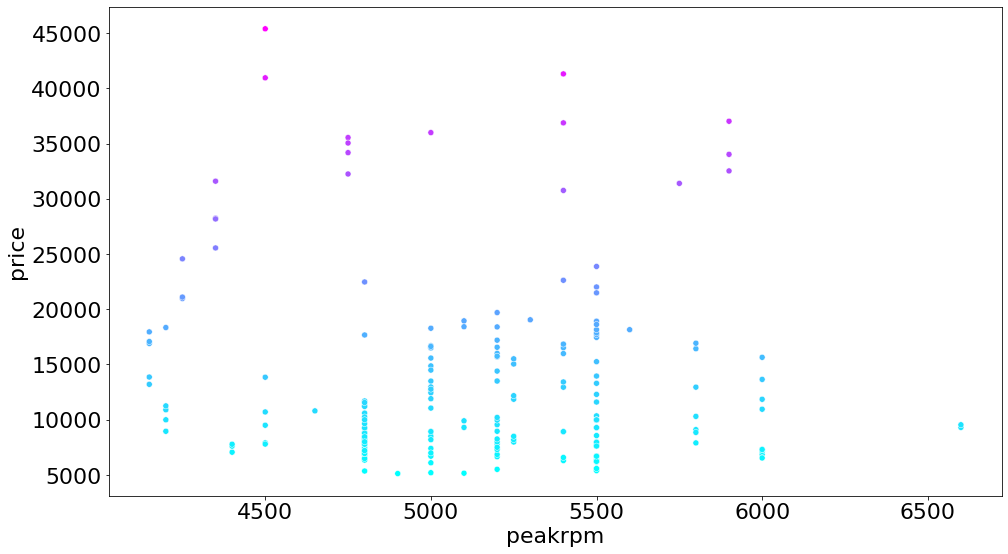

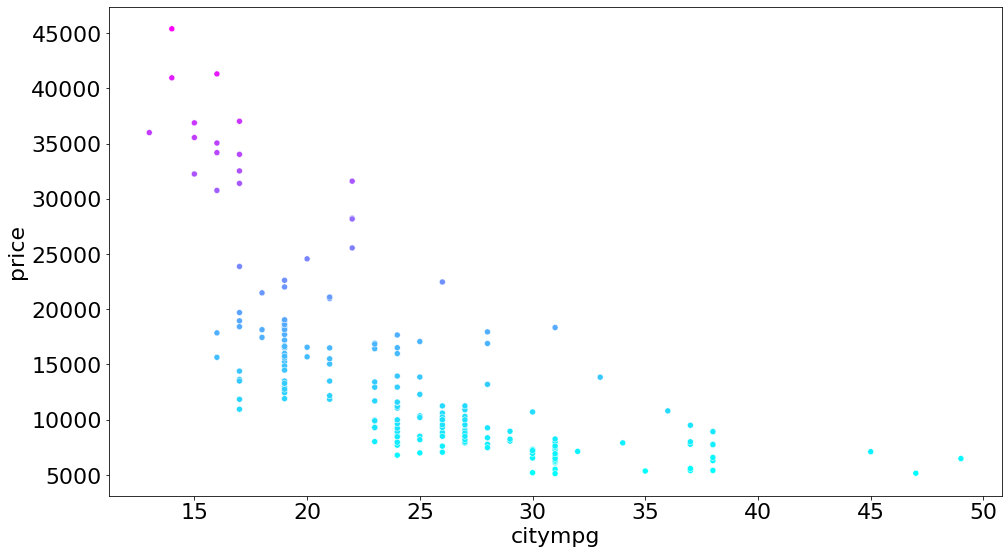

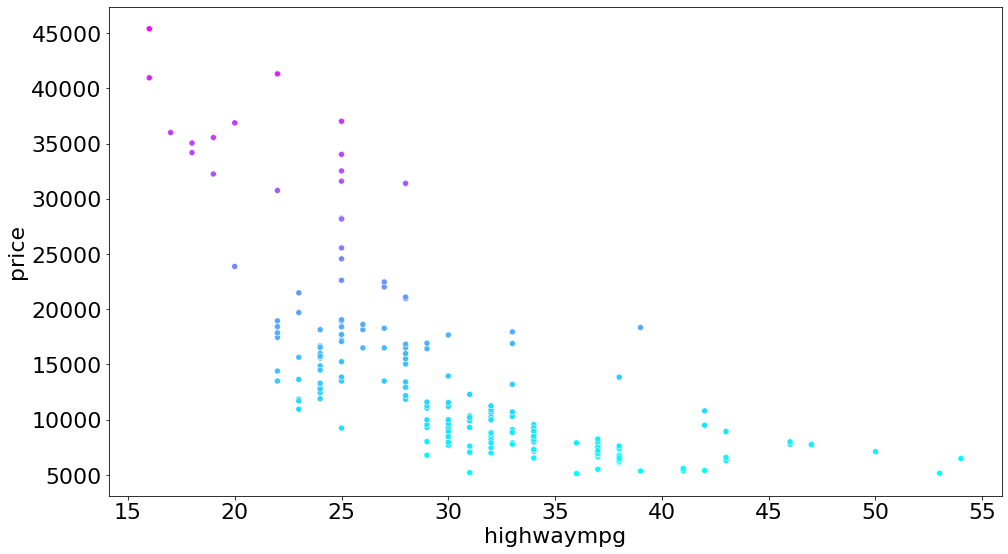

In [137]:

for feature in df.columns:
    if(feature != 'price'):
        plt.figure(figsize=(16, 9))
        sns.scatterplot(data=data, x=feature, y='price', 
                     hue='price',
                     palette='cool', legend=False)

### Split the data for training and testing

In [138]:
from sklearn.model_selection import train_test_split
training_data = df.drop("price", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(training_data, df.price, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (153, 5)
Shape of testing  set = (52, 5)


### Train the model

In [139]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'enginesize: {linear_regression.coef_[0]:24.20f}')
print(f'horsepower: {linear_regression.coef_[1]:24.20f}')
print(f'peakrpm: {linear_regression.coef_[2]:24.20f}')
print(f'citympg: {linear_regression.coef_[3]:24.20f}')
print(f'highwaympg: {linear_regression.coef_[4]:24.20f}')

print(f'y-intercept: {linear_regression.intercept_:23.20f}')

enginesize: 130.25296882866186365391
horsepower:  34.16978051382868386554
peakrpm:   0.42524841005194247145
citympg:  49.27102466377476730486
highwaympg: -151.88307837718639348168
y-intercept: -5691.18537200647006102372


### Test the model

In [140]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)
print("Expected and Pridicted values:")
print(f' coefficient of determination = {r2:.1f}')
print(f' correlation coefficient = {r:.1f}')

Expected and Pridicted values:
 coefficient of determination = 0.7
 correlation coefficient = 0.8


### Visualize expected vs predicted prices of cars

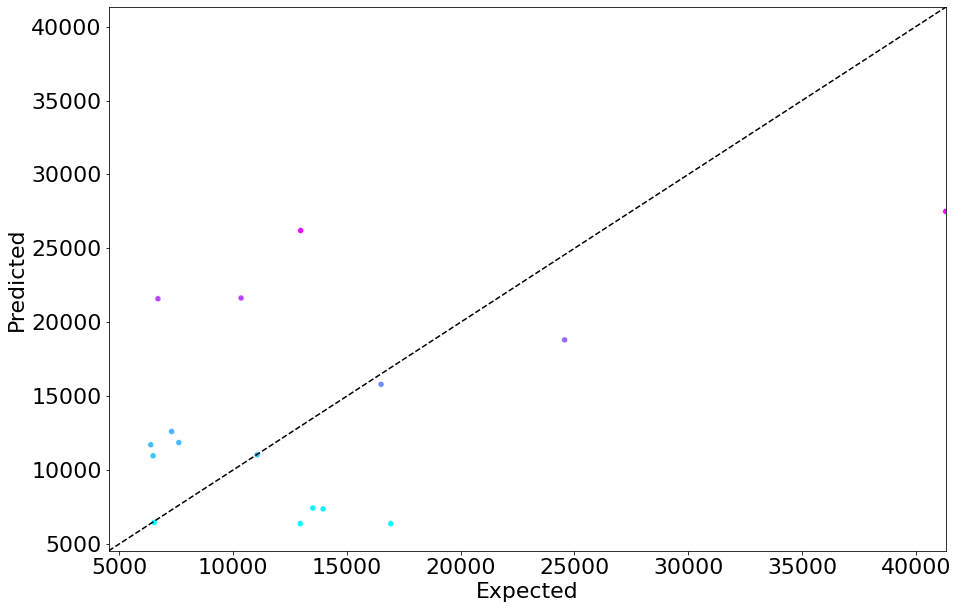

In [141]:
import seaborn as sns

df1 = pd.DataFrame()

df1['Expected']  = pd.Series(expected)
df1['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df1, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

### As per outcome of coefficient of determination = 0.7, correlation coefficient = 0.8 of predicted and expected values and we can say that correlation coefficient are pretty good and cars prices are correlated with various factor. 